### Nama : Leonardo Bryan Nathanael
### NIM : 215314102

In [125]:
import pandas as pd
import numpy as np 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Optimizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


In [126]:
data=pd.read_csv('iris.csv')
data.columns=['Sepallength','SepalWidth','PetalLength','PetalWidth','Lavel']
#data.drop('Lavel',axis=1,inplace=True)
data.head()

,Sepallength,SepalWidth,PetalLength,PetalWidth,Lavel
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [127]:
# Menyimpan Sepallength ke dalam variabel x
x = data.iloc[:, :-1]

# Menyimpan SepalWidth ke dalam variabel y
y = data.iloc[:, -1]

# Menggunakan LabelEncoder untuk mengonversi label string menjadi nilai numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [128]:
# Menggunakan OneHotEncoder untuk melakukan one-hot encoding pada y_encoded
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

/home/bryan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [129]:
# Assuming y_encoded is the encoded version of your target variable using LabelEncoder
y_encoded = label_encoder.fit_transform(y)

# Perform one-hot encoding on y_encoded
y_one_hot = to_categorical(y_encoded, num_classes=3)

y_one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [130]:
x.shape

(149, 4)

In [131]:
#Initializing Artificial Neural Network (ANN)
model = Sequential()
#Adding input layer and first hidden layer
model.add(Dense(3,activation="relu", input_dim=4))
#Adding second hidden layer
model.add(Dense(3,activation="relu"))
#Adding output layer
model.add(Dense(3,activation="sigmoid"))
#Compiling ANN
sgd=keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [132]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 3)                 15        
                                                                 
 dense_28 (Dense)            (None, 3)                 12        
                                                                 
 dense_29 (Dense)            (None, 3)                 12        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
# Melatih model dengan menggunakan y_onehot dan memonitor kinerja pada data validasi
history = model.fit(x, y_onehot, epochs=200, steps_per_epoch=5, validation_split=0.2)


Epoch 1/200


5/5 [==============================] - 1s 29ms/step - loss: 0.9306 - accuracy: 0.5966 - val_loss: 1.8297 - val_accuracy: 0.0000e+00
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: 0.9172 - accuracy: 0.6975 - val_loss: 1.7627 - val_accuracy: 0.0000e+00
Epoch 3/200
5/5 [==============================] - 0s 6ms/step - loss: 0.9102 - accuracy: 0.7479 - val_loss: 1.6996 - val_accuracy: 0.0000e+00
Epoch 4/200
5/5 [==============================] - 0s 6ms/step - loss: 0.9028 - accuracy: 0.7731 - val_loss: 1.6461 - val_accuracy: 0.0000e+00
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 0.8957 - accuracy: 0.7983 - val_loss: 1.6039 - val_accuracy: 0.0000e+00
Epoch 6/200
5/5 [==============================] - 0s 6ms/step - loss: 0.8882 - accuracy: 0.8067 - val_loss: 1.5817 - val_accuracy: 0.0000e+00
Epoch 7/200
5/5 [==============================] - 0s 6ms/step - loss: 0.8819 - accuracy: 0.8067 - val_loss: 1.5610 - val_accuracy: 0.0000e+00
Epoch 8/20

In [134]:
result=model.predict(x,verbose=0,steps=1)

In [135]:
print(result)

[[9.96457517e-01 7.15924382e-01 1.29093387e-04]
 [9.95886743e-01 7.09568024e-01 1.64713420e-04]
 [9.95013118e-01 7.01244473e-01 2.25556287e-04]
 [9.96732473e-01 7.19325781e-01 1.13158829e-04]
 [9.97503936e-01 7.30475426e-01 7.29600797e-05]
 [9.95305479e-01 7.03871012e-01 2.04369295e-04]
 [9.96585369e-01 7.17474639e-01 1.21584548e-04]
 [9.94272053e-01 6.95167959e-01 2.82840047e-04]
 [9.96196449e-01 7.12909341e-01 1.44969061e-04]
 [9.97663081e-01 7.33158588e-01 6.55362164e-05]
 [9.95647192e-01 7.07136512e-01 1.80653224e-04]
 [9.96022522e-01 7.11003840e-01 1.55936112e-04]
 [9.94438589e-01 6.96467996e-01 2.69530545e-04]
 [9.98588264e-01 7.53987908e-01 2.80981621e-05]
 [9.98281598e-01 7.45557010e-01 3.96004689e-05]
 [9.97951627e-01 7.38474548e-01 5.28760356e-05]
 [9.97097790e-01 7.24269927e-01 9.32738258e-05]
 [9.98102367e-01 7.41525650e-01 4.66874408e-05]
 [9.96926486e-01 7.21884847e-01 1.02414648e-04]
 [9.97440815e-01 7.29454160e-01 7.59882678e-05]
 [9.96992707e-01 7.22792029e-01 9.884243

In [136]:
# Visualisasi nilai aktual dan nilai prediksi
y_pred_onehot = model.predict(x)
y_pred_classes = np.argmax(y_pred_onehot, axis=1)
y_actual_classes = np.argmax(y_onehot, axis=1)

5/5 [==============================] - 0s 929us/step


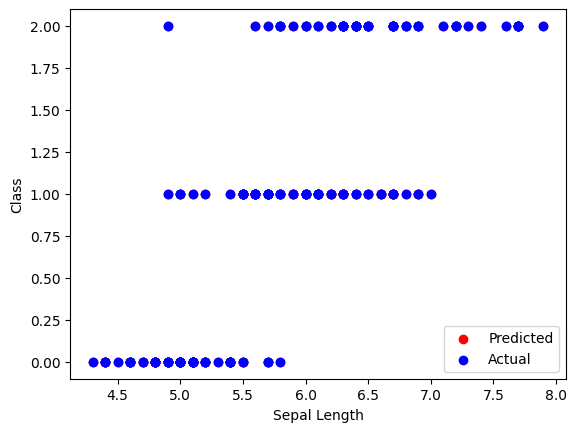

In [137]:
plt.scatter(x['Sepallength'], y_pred_classes, color='red', label='Predicted')
plt.scatter(x['Sepallength'], y_actual_classes, color='blue', label='Actual')
plt.xlabel('Sepal Length')
plt.ylabel('Class')
plt.legend()
plt.show()

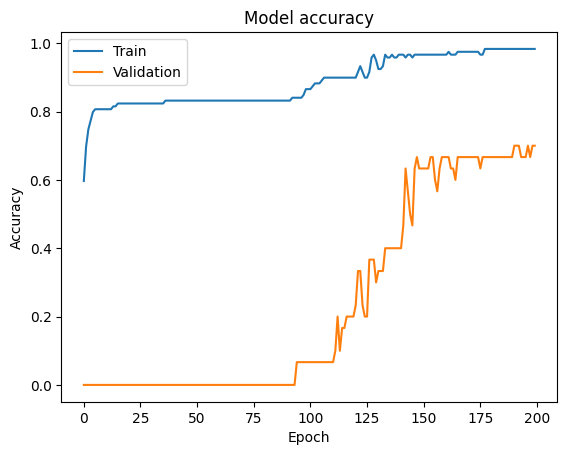

In [138]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


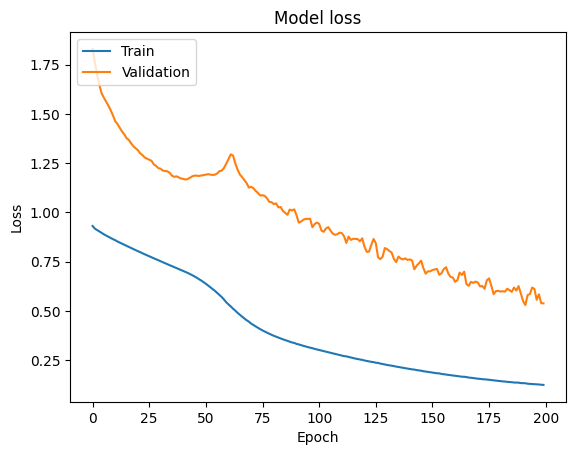

In [139]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [140]:
dataakurasi=history.history['accuracy']

In [141]:
max(dataakurasi)

0.9831932783126831